# Edge velocity

In this notebook we will plot the dependence of the edge velocity with the tilt angle. We will plot the differentiated velocity for up and down particles to see when the system becomes depinned and it starts sliding. 

In [1]:
import sys
import os
sys.path.insert(0, '../magcolloids')

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from IPython.display import HTML, clear_output
import jsonpickle
import scipy.optimize as spo
import scipy.spatial as spa 
import magcolloids as mgc
import matplotlib as mpl
import string as st

import support as sp

from tqdm import tqdm_notebook

ureg = mgc.ureg

idx = pd.IndexSlice

%reload_ext autoreload
%autoreload 2

In [2]:
mpl.rc('text', usetex=True)
mpl.rcParams['figure.dpi'] = 150

In [3]:
directory = "Z:/Dimers/Simulations/FrequencySweep_3.9/"

In [4]:
diff_vel = pd.read_csv(os.path.join(directory,"differentiated_velocities_cleaner.dat"), sep = "\t", index_col = [0,1,2,3])

In the [Current Angle](Current_Angle.ipynb), we define the direction through the vector of the velocity of the *up* particles minus the velocity of the *down* particles:

In [5]:
edge_vel = diff_vel.loc[idx[:,:,:,"up"],:].reset_index(level=3,drop=True) - \
    diff_vel.loc[idx[:,:,:,"down"],:].reset_index(level=3,drop=True)

From this, we can now define a director vector $\mathbf{n}$ which is a unit vector in the average direction of travel.

In [6]:
edge_vel["theta"] = np.arctan2(edge_vel.y, edge_vel.x)/np.pi*180
edge_vel["nx"] = np.cos(edge_vel.theta*np.pi/180)
edge_vel["ny"] = np.sin(edge_vel.theta*np.pi/180)

Using the director, we calculate the projection of the *up* and *down* velocity.

In [7]:
diff_vel["vn"] = edge_vel.nx*diff_vel.x+edge_vel.ny*diff_vel.y

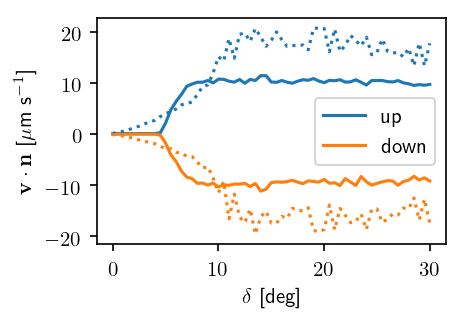

In [8]:
fig = plt.figure(figsize=(3,2))

up = plt.plot(diff_vel.loc[idx[3.9,:,3,"down"],:].index.get_level_values("tilt"),
         diff_vel.loc[idx[3.9,:,3,"up"],:].vn, label = "up")
dn = plt.plot(diff_vel.loc[idx[3.9,:,3,"down"],:].index.get_level_values("tilt"),
         diff_vel.loc[idx[3.9,:,3,"down"],:].vn, label = "down")

plt.plot(diff_vel.loc[idx[3.9,:,6,"down"],:].index.get_level_values("tilt"),
         diff_vel.loc[idx[3.9,:,6,"up"],:].vn,":", label = "_nolabel_", color = up[0].get_color())
plt.plot(diff_vel.loc[idx[3.9,:,6,"down"],:].index.get_level_values("tilt"),
         diff_vel.loc[idx[3.9,:,6,"down"],:].vn,":", label = "_nolabel_", color = dn[0].get_color())

plt.xlabel(r"$\delta$ [deg]")
plt.ylabel(r"$\mathbf{v}\cdot\mathbf{n}$ [$\mu$m s$^{-1}$]")
plt.legend()

fig.savefig('velocity_vs_tilt.pdf', pad_inches = 0, bbox_inches = "tight")

In [9]:
diff_vel.head()

x         y        vn
height tilt frequency plane                              
3.9    0.0  0.125     down   0.075122  0.129207 -0.147735
                      up    -0.027868 -0.132720  0.133713
            0.250     down  -0.185014 -0.194005 -0.268059
                      up     0.164563  0.182301  0.245566
            0.375     down  -0.134805  0.307006 -0.334951

In [10]:
diff_vel.loc[idx[3.9,:,3,:],["vn"]].reset_index(
    level=[0,2],drop=True).swaplevel(
    i=1, j=0).sort_index().to_csv("velocity_vs_tilt.dat",sep="\t")